In [43]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set()

In [44]:
stockCSV = pd.read_csv('stockdata.csv')

In [45]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [46]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values

In [47]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [48]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

# Exploratory Data Analysis (2)
### via Granger Causality Test

The Granger Causalitytest is used to test for "Granger Causality" or the degree to which two time series datasets are temporally related.

A simple linear regression would not produce a reliable correlation value as changes in one time series may not immediately affect the other. The P-value obtained from a Granger Causality test allows us to check the validiaty of the Null Hypothesis. The smaller the P-value, the more likely it is that the NULL hypothesis can be rejected.

( NULL Hypothesis: There is NO correlation between the datasets. )

Before we apply the Granger causality test, we would need to check for stationarity. 
Stationarity, in the context of time series analysis is where the statistical properties of the process do not change over time, in other words it the patterns/trends of a data is not volatile and randomly changing.

As global commodities such as wheat, rice, gold, crude oil and companies such as Tesla are heavily impacted by external forces such as geopolitics, changes in global markets and many more, the time series data tends to be non-stationary and hence differnecing is done to improve the stationarity of the data.


In [49]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

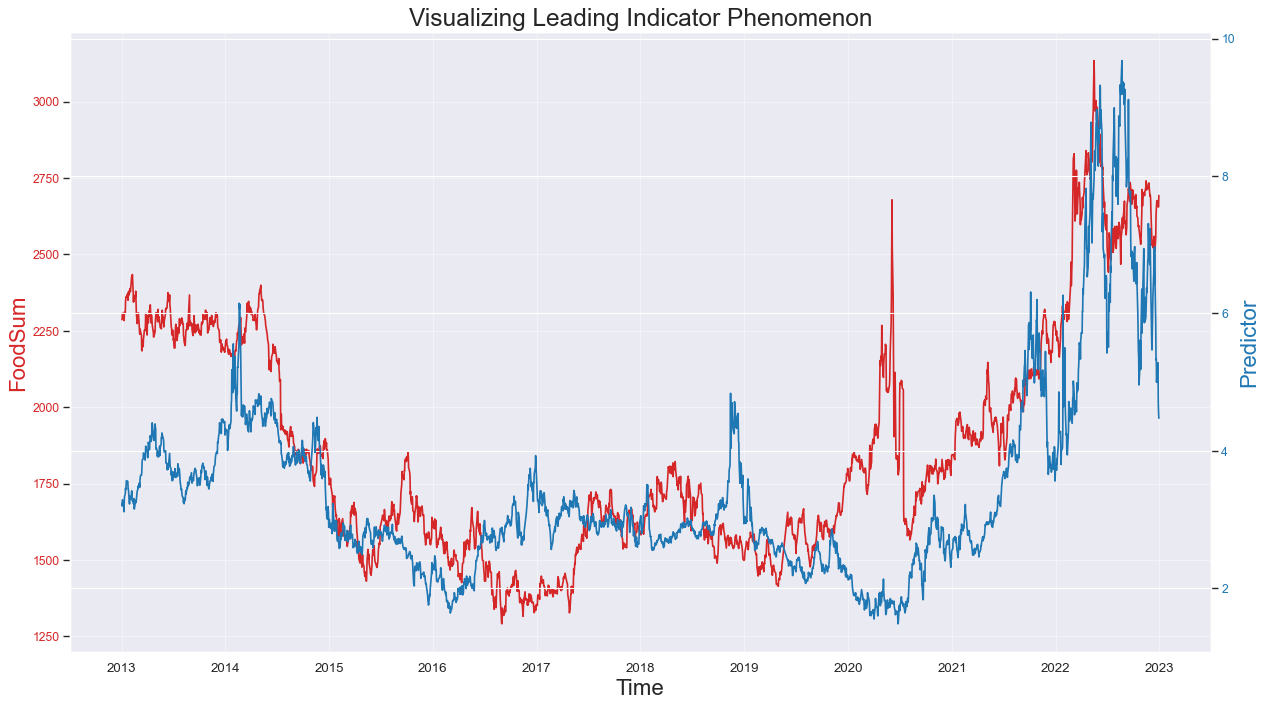

In [50]:
df = stockCSV.copy()  #setting time axis
df = df.set_index('Date')

df.index = pd.to_datetime(df.index)
x = df.index

y1 = stockCSV['Foodsum']
y2 = stockCSV['NG=F']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('FoodSum', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Predictor", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
fig.tight_layout()
plt.show()

In [51]:
pip install numpy scipy patsy pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install statsmodels==0.14.1

Note: you may need to restart the kernel to use updated packages.


In [53]:
from statsmodels.tsa.stattools import grangercausalitytests

In [54]:
maxlag = 12
test   = 'ssr_chi2test'

In [55]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [56]:
#Natural Gas

#differnecing is done to convert non-stationary data to stationary data
y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)

grangers_causation_matrix(combined_df, variables = combined_df.columns)

,Foodsum_x,NG=F_x
Foodsum_y,1.0000,0.0004
NG=F_y,0.0856,1.0000


In [57]:
def granger_causality(x,y1,y2):
        
        # Plot Line1 (Left Y Axis)
        fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
        ax1.plot(x, y1, color='tab:red')

        # Plot Line2 (Right Y Axis)
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.plot(x, y2, color='tab:blue')

        # Decorations
        # ax1 (left Y axis)
        ax1.set_xlabel('Time', fontsize=20)
        ax1.tick_params(axis='x', rotation=0, labelsize=12)
        ax1.set_ylabel('FoodSum', color='tab:red', fontsize=20)
        ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
        ax1.grid(alpha=.4)

        # ax2 (right Y axis)
        ax2.set_ylabel("Predictor", color='tab:blue', fontsize=20)
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
        fig.tight_layout()
        plt.show()
        

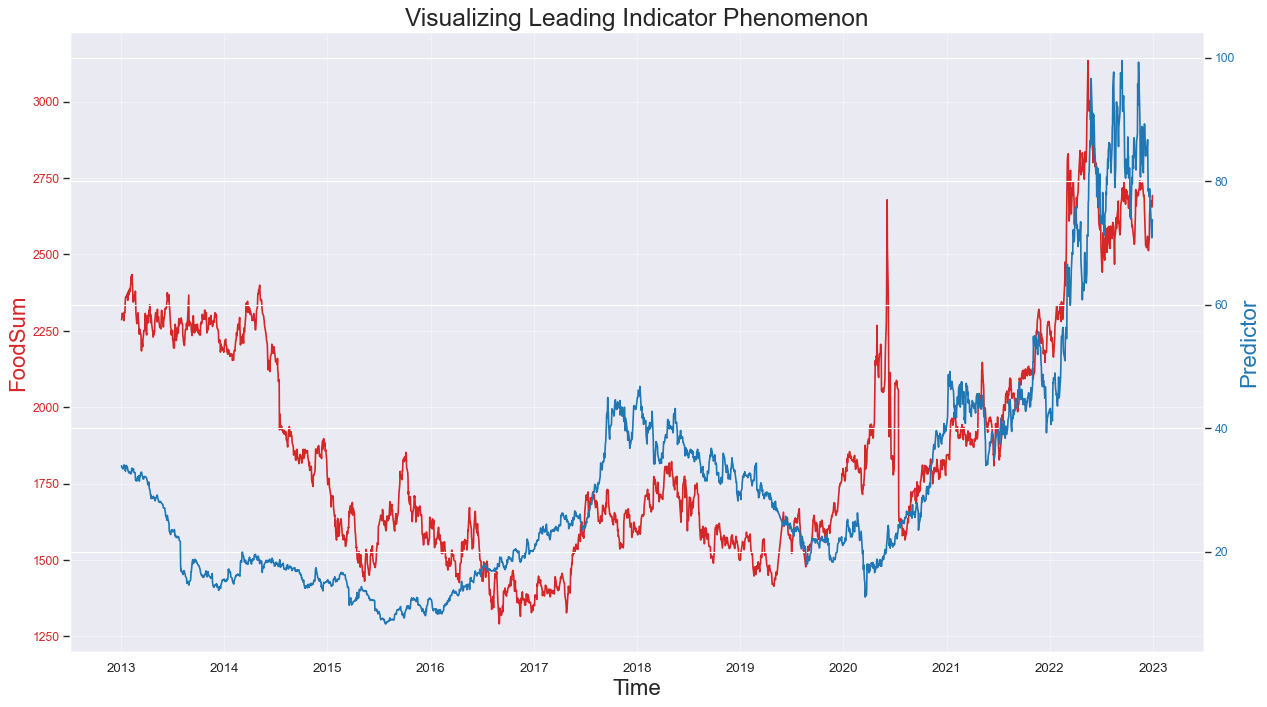

,Foodsum_x,SQM_x
Foodsum_y,1.0000,0.0011
SQM_y,0.0537,1.0000


In [58]:
#Fertiliser
granger_causality(x, stockCSV['Foodsum'], stockCSV['SQM'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['SQM']

y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

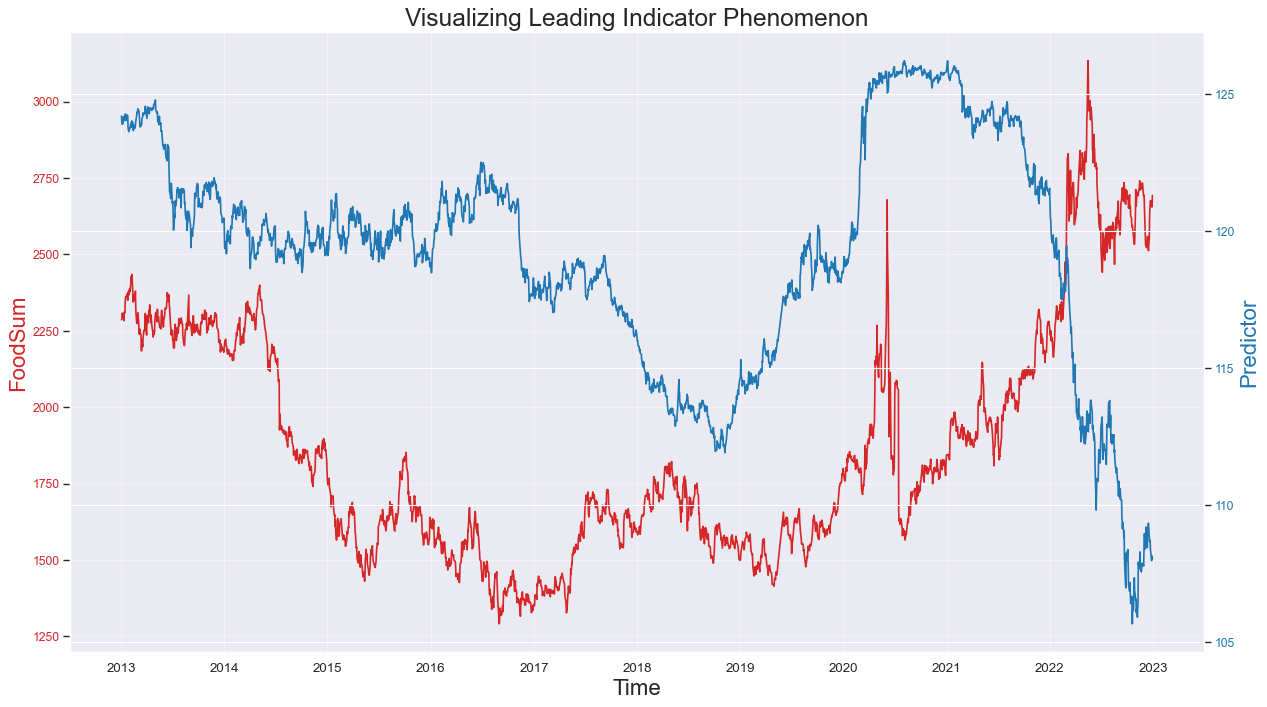

,Foodsum_x,ZF=F_x
Foodsum_y,1.0000,0.1221
ZF=F_y,0.0324,1.0000


In [59]:
#Bonds

granger_causality(x, stockCSV['Foodsum'], stockCSV['ZF=F'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['ZF=F']

y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

We can thus see that Bonds are not that good at being used as a predictor for "Foodsum" as the chance they may not be temporally related is quite high.

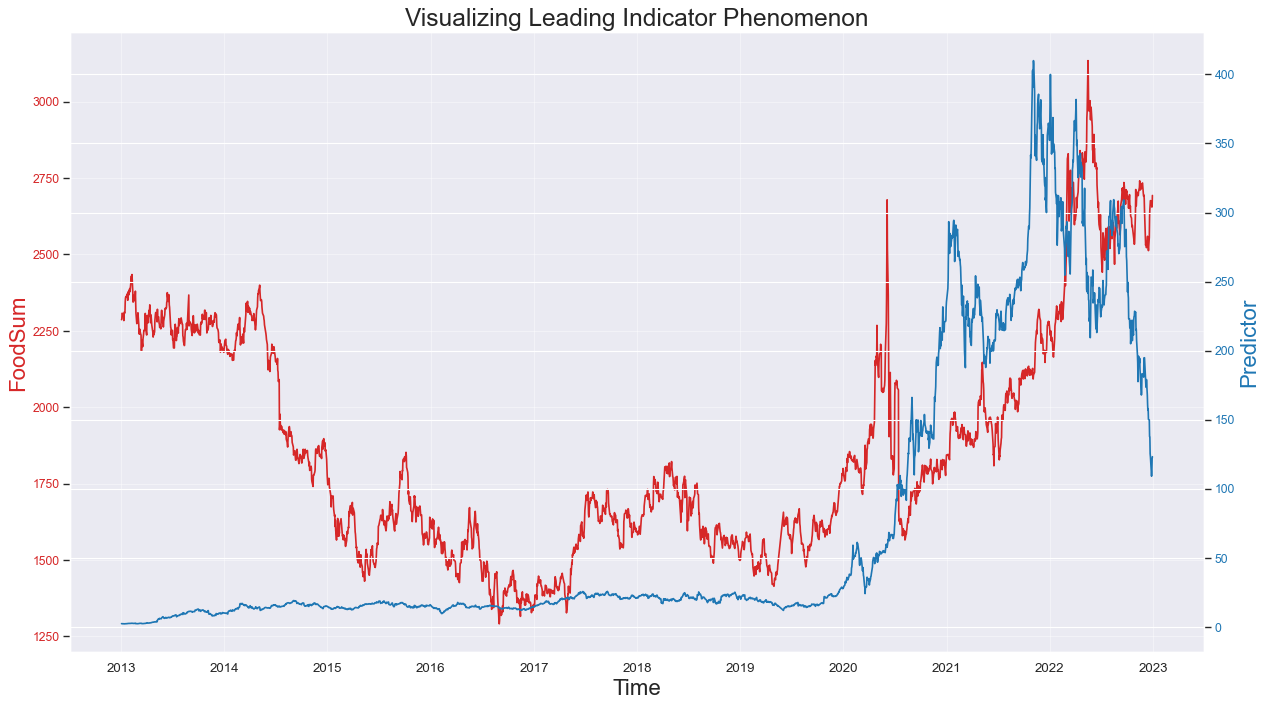

,Foodsum_x,TSLA_x
Foodsum_y,1.0000,0.0
TSLA_y,0.3239,1.0


In [60]:
#Tesla

granger_causality(x, stockCSV['Foodsum'], stockCSV['TSLA'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['TSLA']

y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

The granger causality test p-value for Tesla is 0.0 which we find it to be anomolous possibly due to the fact that TESLA only truly started becoming influential in the later half of the decade and hence even after differencing, Tesla's value may not be truly stationary, thus rendering the granger causality test ineffective.

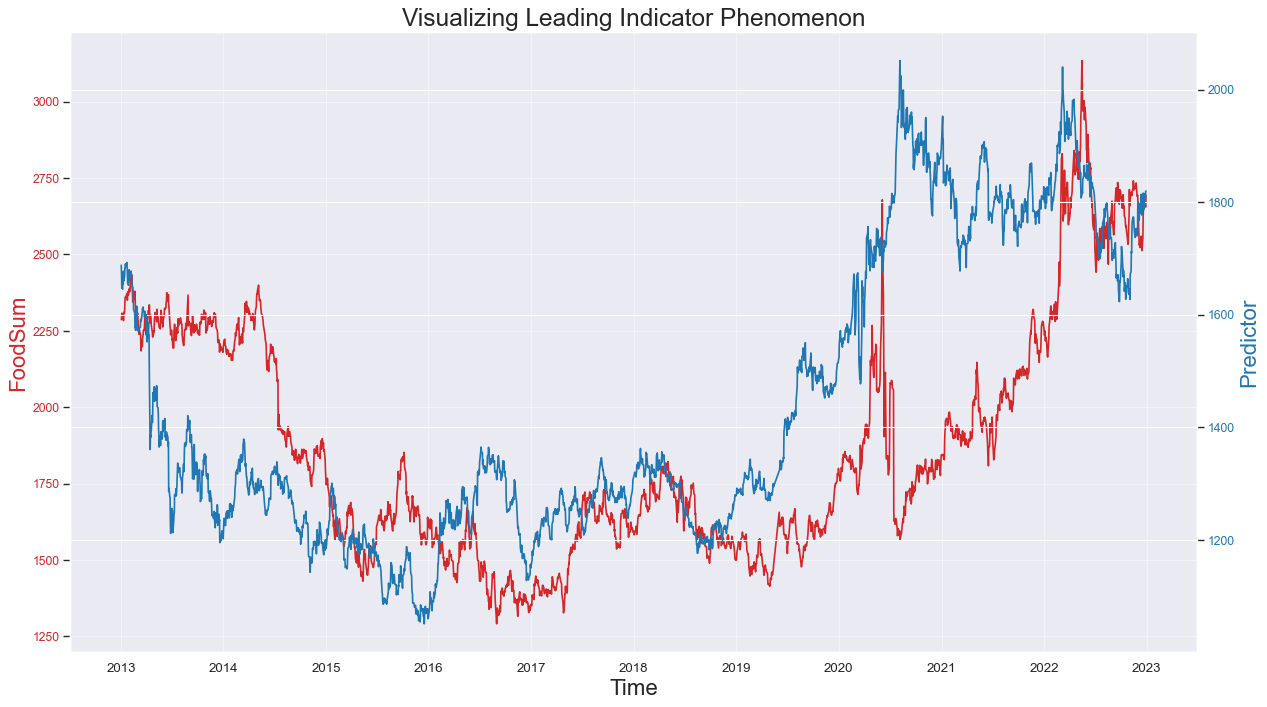

,Foodsum_x,GC=F_x
Foodsum_y,1.0000,0.0301
GC=F_y,0.1299,1.0000


In [61]:
#Gold/Inflation

granger_causality(x, stockCSV['Foodsum'], stockCSV['GC=F'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['GC=F']

y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

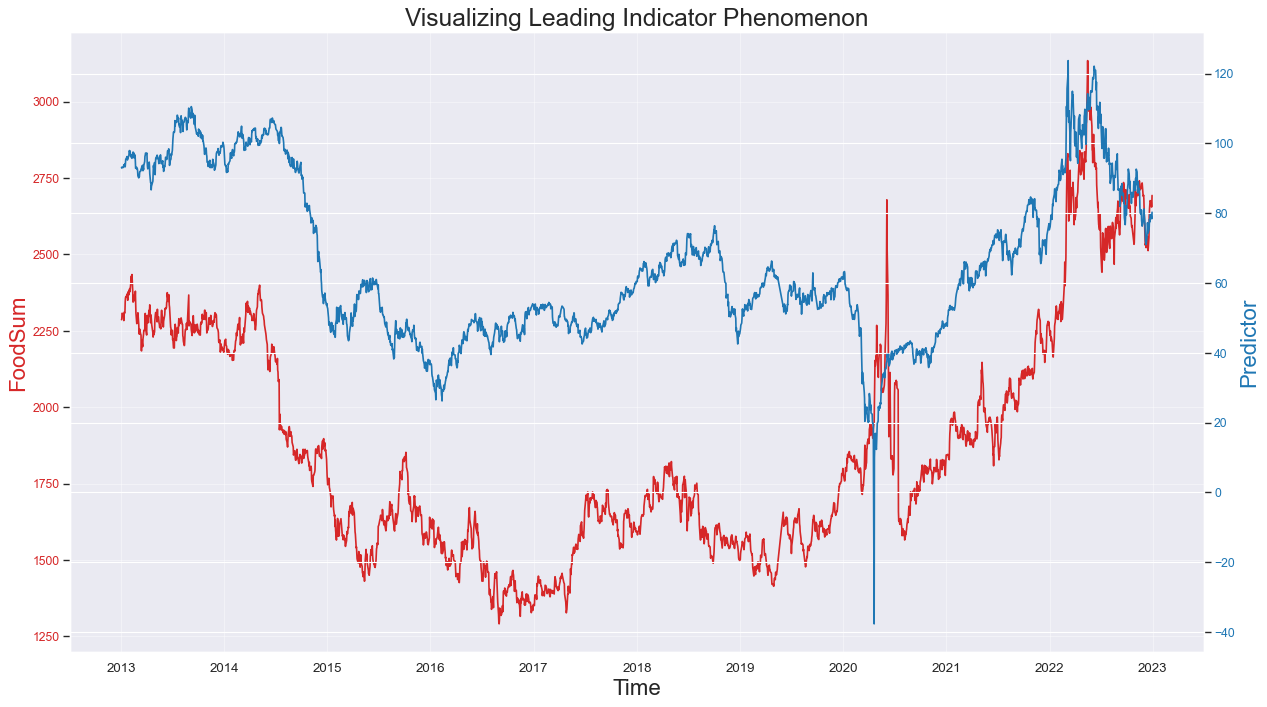

,Foodsum_x,CL=F_x
Foodsum_y,1.0000,0.0004
CL=F_y,0.0088,1.0000


In [62]:
#Crude Oil

granger_causality(x, stockCSV['Foodsum'], stockCSV['CL=F'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['CL=F']

y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

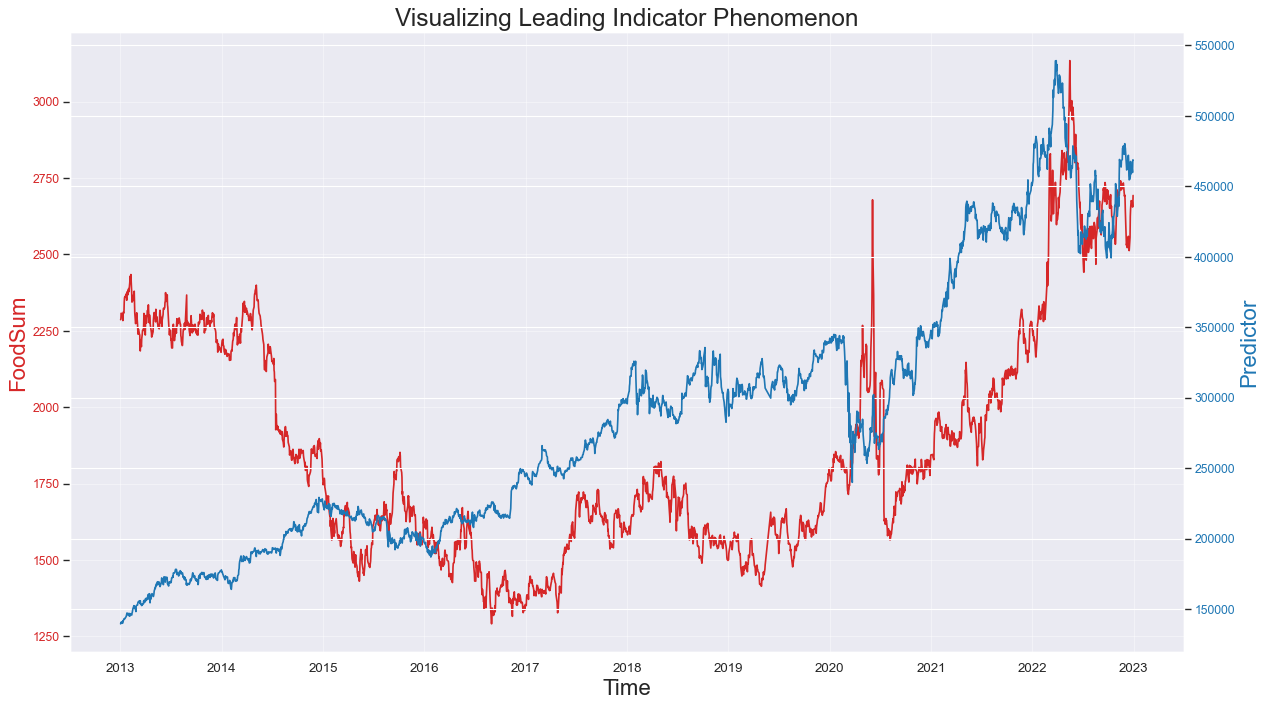

,Foodsum_x,BRK-A_x
Foodsum_y,1.0000,0.0177
BRK-A_y,0.0223,1.0000


In [63]:
#Berkshire Hathaway

granger_causality(x, stockCSV['Foodsum'], stockCSV['BRK-A'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['BRK-A']

y1_diff = y1.diff()
y2_diff = y2.diff()

y1_diff = y1_diff.dropna()
y2_diff = y2_diff.dropna()

combined_df = pd.concat([y1_diff, y2_diff], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

                   Granger Causality test p-value
    Crude Oil:                0.0004

    Natural Gas:              0.0004

    Fertiliser:               0.0011

    Gold:                     0.0301

    Bonds:                    0.1221

    Tesla:                    0.0 (anomalous)

    Berkshire:                0.0177


This is the compiled list of the granger causality test results,examining the "temporal relatedness" between the predictors above and food prices (Foodsum). For this project, we assume p-value of 0.05 and below to be significant to reject NULL hypothesis.

From this we can see that bonds have a significant p-value (0.1221), thus we cannot reject the null hypothesis with certainty which suggests that bonds do not have a predictive influence on food price.

Tesla's Granger causality test yielded an anomalous p-value of 0.0, likely because Tesla's substantial price increases in the market began mainly in the later half of the decade. Despite differencing, Tesla's value might not be truly stationary, rendering the Granger causality test ineffective.

The other 5 predictors have a p-value of lower than 0.05, thus we can reject the NULL hypothesis that there is no relation between the variables. This suggests that these 5 predictors do have a predictive influence on food price. However, since granger causality test does not establish a true 'cause and effect' relationship, we will plug these 5 predictors and Foodsum into XGBoost, a machine learning model that can predict a time series(foodsum) data using a another time series(predictor). This will allow us to check the correlation between food price and the other variables based on the closeness of predicted food price values with actual food price values.


References:

https://forecastegy.com/posts/differencing-time-series-in-python-with-pandas-numpy-and-polars/

https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/

https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/